<div>
<img src="tp11_logo.png", width=300, ALIGN="left">
<center>
<h1>Mini Projets 2020 (Info 232)</h1>
Isabelle Guyon <br>
info232@chalearn.org <br>
</center>
<span style="color:red"> <h1> 11. Graphs </h1> </span>
<br> The goal of this homework is to help you create more interesting graphs for your video and your report. You do NOT need to use them all in your video and your report. Choose only the MOST INTERESTING ones and COMMENT on them.
</center>
<br><br><b>Save your notebook often with menu File + Save and Checkpoint.</b>
<br> <b>Before you push your homework to your GitHub repo, use  Kernel + Restart and Run all.</b> 
<br> <b>Submit URL to ChaGrade (http://chagrad.lri.fr).</b> 
<br><i>This code was tested with: Python 3.7 | Anaconda latest (https://anaconda.org/)</i><br>
</div>

<div style="background:#AAFFFF">
<h3> To show that you personalized your code, put your own Mardown cells on a HIGHLIGHTED background. </h3>
</div>

In [1]:
model_dir = 'sample_code_submission/'      
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
# Comment the next lines to avoid auto-reload libraries if this causes problem with pickles in Python 3
%load_ext autoreload
%autoreload 2
from checker import check
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

<h1> Part 1: Data visualization </h1>
<p>
<ul>
    <li> Subtitute the data by  the data of YOUR OWN CHALLENGE.
    <li> Never uses a graph in your video or report without EXPLAINING IT.
    <li> Use first "sample_data" to test this notebook, then replace it with <b>"public_data"</b> (your entire dataset).
    </ul>
<span style="color:red"><b>WARNING: We provide in this TP only SAMPLE DATA from each challenge, for test purposes.</b></span>

In [2]:
data_dir = 'iris'              #  Change this to the directory where you put your own public data
data_name = 'iris'
!ls $data_dir*

iris_feat.name      iris_public.info    iris_train.data     iris_valid.solution
iris_label.name     iris_test.data      iris_train.solution public_data
iris_private.info   iris_test.solution  iris_valid.data


For convenience, we load the data as a "pandas" data frame, so we can use "pandas" and "seaborn" built in functions to explore the data.

In [3]:
from data_io import read_as_df
data = read_as_df(data_dir  + '/' + data_name)                # The data are loaded as a Pandas Data Frame

Reading iris/iris_train from AutoML format
Number of examples = 35
Number of features = 4
        Class
0      setosa
1  versicolor
2   virginica
Number of classes = 3


## Part 1.1: Taking a look at the whole data matrix
Use "data.describe()" to show statistics.

Use "data.head()" if you want to look only at the first few lines. A few nice tricks:
- to show the coefficients as a heat map is to append ".style.background_gradient(cmap='Blues')"
- to limit the precision to two significant digits, use .set_precision(2).

In [4]:
# Data statistics
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,35.000000,35.000000,35.000000,35.000000
mean,5.625714,3.005714,3.402857,1.054286
std,0.892565,0.421442,1.962514,0.839588
min,4.300000,2.000000,1.000000,0.100000
25%,4.900000,2.800000,1.450000,0.200000
50%,5.500000,3.000000,3.700000,1.000000
75%,6.300000,3.250000,5.100000,1.800000
max,7.700000,4.000000,6.700000,2.500000


In [5]:
# First few lines
data.head().style.background_gradient(cmap='Blues').set_precision(2)

,sepal_length,sepal_width,petal_length,petal_width,target
0,4.4,3,1.3,0.2,setosa
1,4.7,3.2,1.6,0.2,setosa
2,6.1,2.6,5.6,1.4,virginica
3,6.4,3.1,5.5,1.8,virginica
4,5.8,4,1.2,0.2,setosa


In [6]:
# Whole data matrix [could be horribly slow if the matrix is large!]
#data.style.background_gradient(cmap='Blues').set_precision(2)

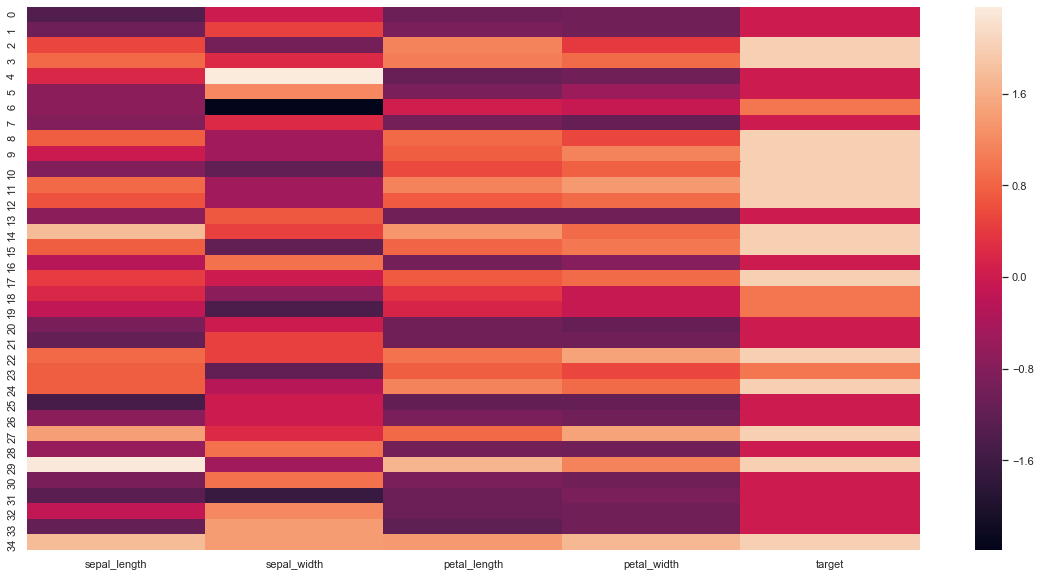

In [7]:
# But sometimes you get better results for heat maps with seaborn.
# Note that this requires you to modify the target column to numeric values
# Also notice that if your variables are not standardized you will see nothing...
data_num = data.copy()  # If you don't use "copy", any change in data_num will also result in a change in data
data_num['target'] = data_num['target'].astype('category')
data_num['target'] = data_num['target'].cat.codes
# Uncomment to standardize; avoid standardizing the target values:
target_values = data_num['target']
data_num = (data_num-data_num.mean())/data_num.std()
data_num['target'] = target_values
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10] # This allows you to adjust the figure size
sns.heatmap(data_num)


Performing hierarchical clustering using euclidean for columns and euclidean for rows
Column clustering completed in 0.0 seconds
Row clustering completed in 0.0 seconds


sample_code_submission/utilities.py:613: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y2 = sch.linkage(D2, method=column_method, metric=column_metric)
sample_code_submission/utilities.py:633: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y1 = sch.linkage(D1, method=row_method, metric=row_metric)


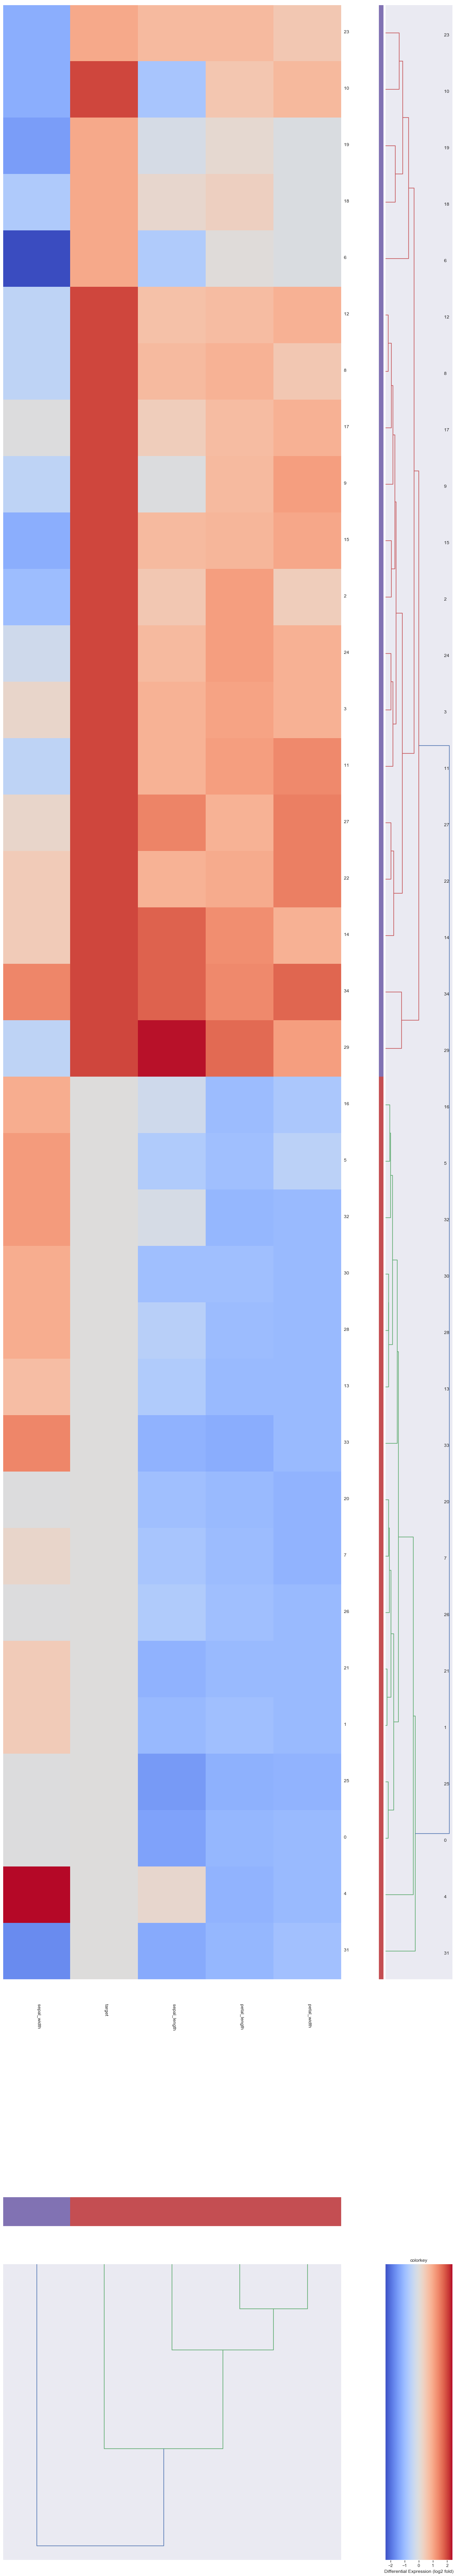

In [8]:
# Yet another way of showin heat maps, with hierarchical clustering
from utilities import heatmap
heatmap(data_num, 'average', 'single', 'euclidean', 'euclidean', 'coolwarm')

## Part 1.1: Univariate plots
Here we show various graphs, which allow you to visualize individual variables (features). They allow you to visualize the density of samples.
Remember: only select INTERESTING graphs.

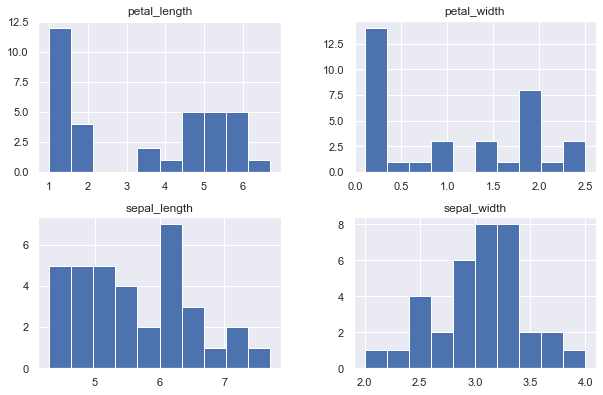

In [9]:
# Histograms: remember, you can play with the number of bins...
chosen_columns = list(data.columns[0:4]) # This allows you to choose which variable to show (avoid showing too many!)
data.hist(column = chosen_columns, figsize=(10, 10), bins=10, layout=(3, 2));

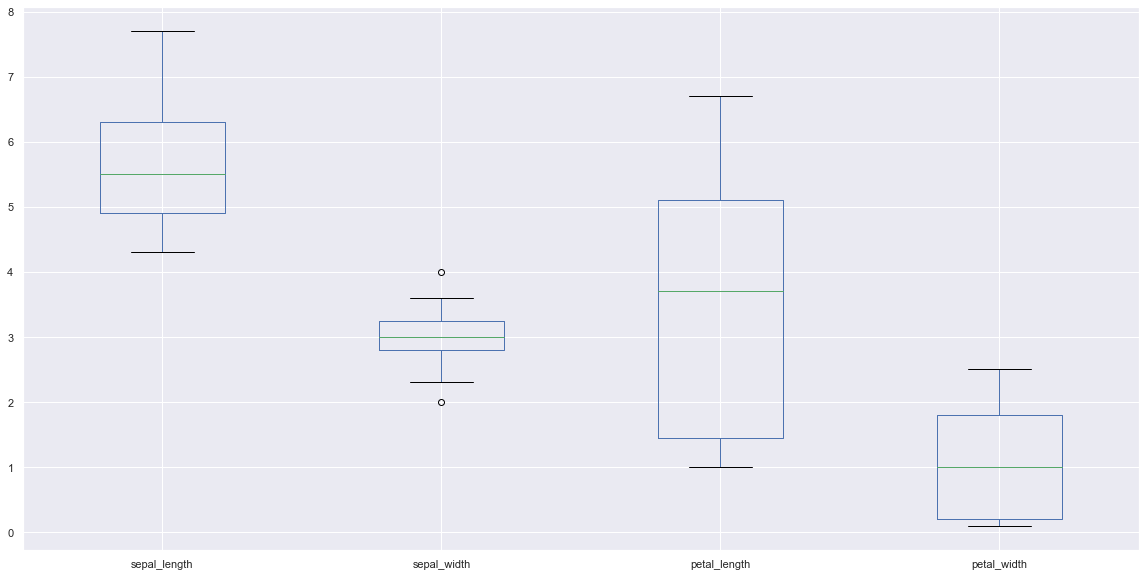

In [10]:
# Box plots: 
data.boxplot(column=list(chosen_columns))

## Part 1.2: Multivariate plots
These allow to visualize multiple variables at a time.

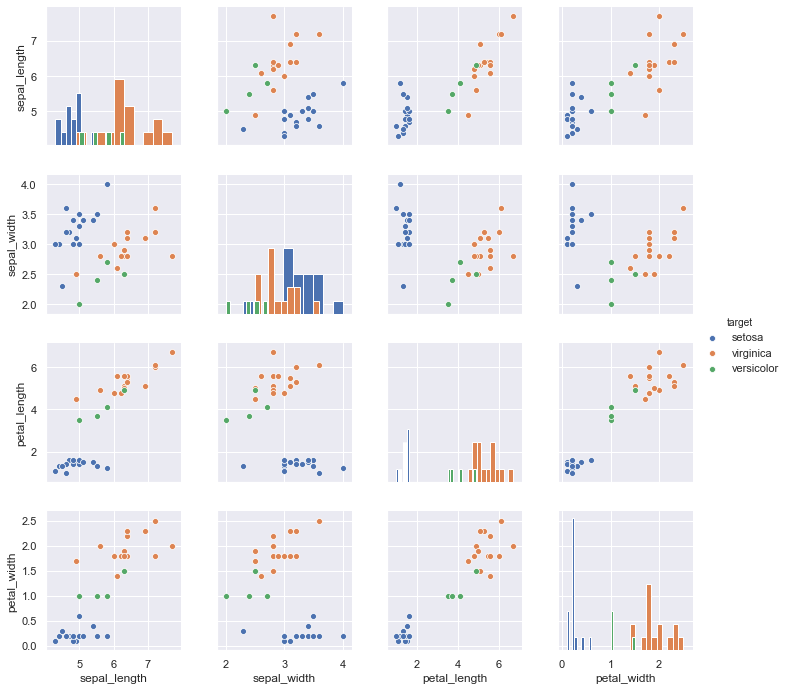

In [11]:
# Pair plots: 
# on the diagonal you have histograms (if diag_kind="hist") or a smoothed histogram (if diag_kind="kde"); 
# off-diagonal you have scatter plots.

sns.pairplot(data, vars = chosen_columns, diag_kind="hist", hue="target")

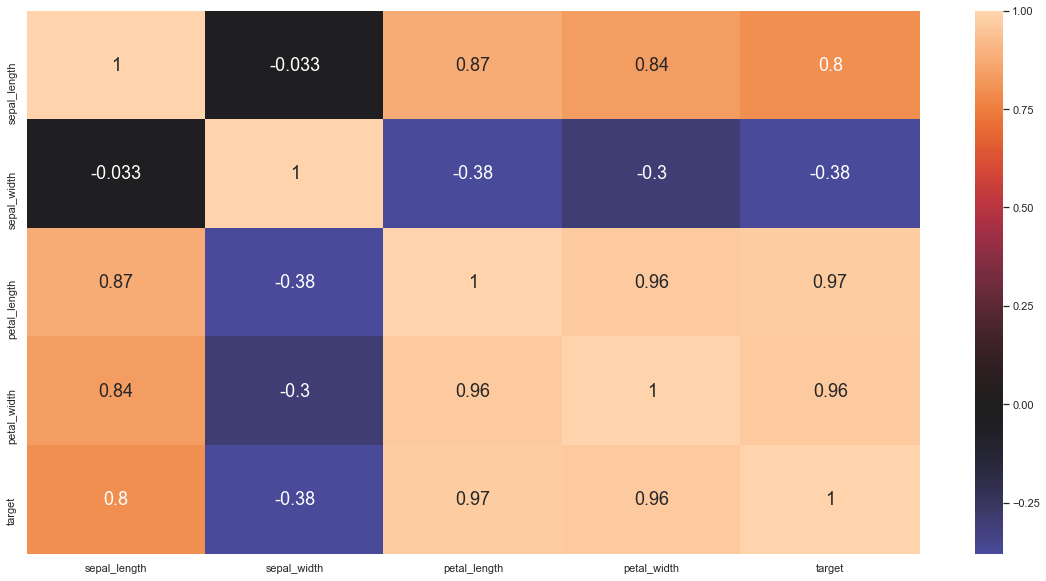

In [12]:
# Correlation matrix
corr_mat = data_num[chosen_columns+['target']].corr(method='pearson') # Reducing your data frame to a a few chosen_columns!
sns.heatmap(corr_mat, annot=True, center=0)
# Note that:
# - it is handy to also plot the target and it can be done only if converted to a numeric value
# - you may want to replace corr_mat by abs(corr_mat), depending on what you want to show

## Part 1.3: Make a little function that does all of this
Once you have experimented with various plotting methods, it is convenient to put them all in a little function to ba able to call them over and over again, on various versions of the data.

Read data
Reading iris/iris_train from AutoML format
Number of examples = 35
Number of features = 4
        Class
0      setosa
1  versicolor
2   virginica
Number of classes = 3
Standardize data
Make hear map


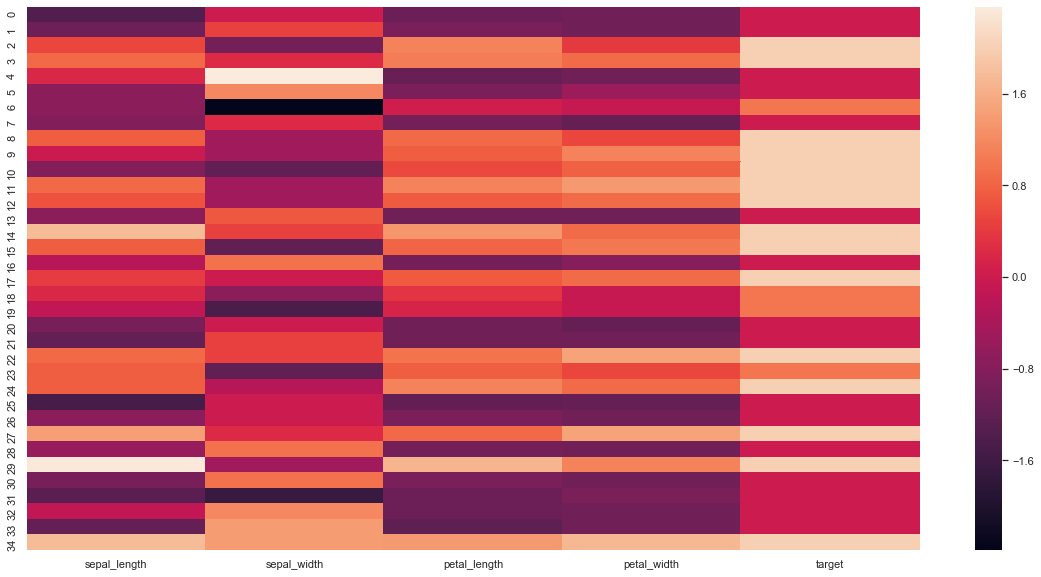

Make scatter plots


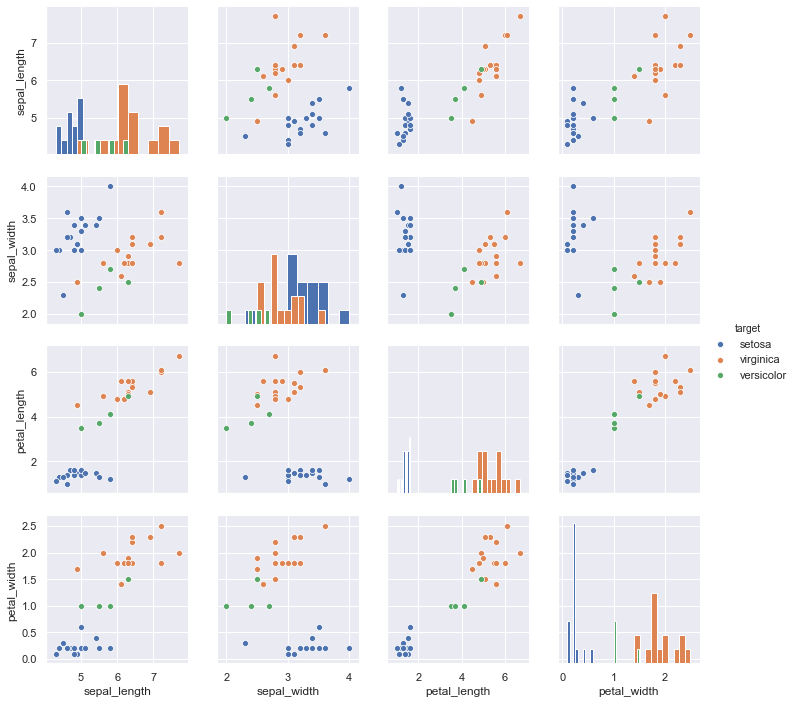

Show correlation matrix


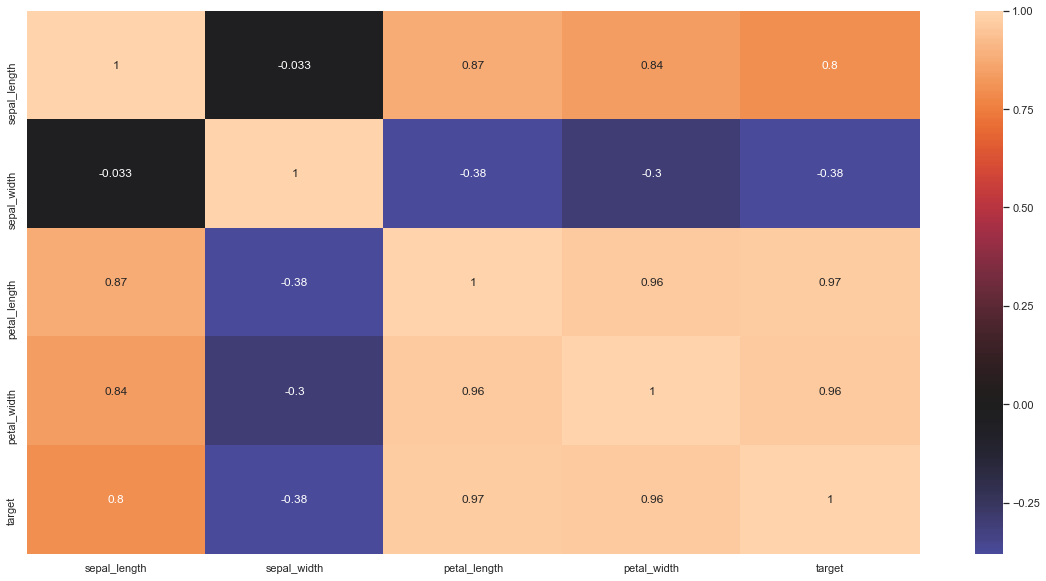

In [13]:
from visualize_data import run_visualization
run_visualization(data_dir, data_name)

## Part 1.4: Create your own DataManager
Another way is to derive from Datamanager a class that contains visualization methods. 

DataManager : iris
info:
	usage = Sample dataset Iris data
	name = iris
	task = multiclass.classification
	target_type = Numerical
	feat_type = Numerical
	metric = bac_metric
	time_budget = 1200
	feat_num = 4
	target_num = 3
	label_num = 3
	train_num = 35
	valid_num = 35
	test_num = 35
	has_categorical = 0
	has_missing = 0
	is_sparse = 0
	format = dense
data:
	X_train = array(35, 4)
	Y_train = array(35,)
	X_valid = array(35, 4)
	Y_valid = array(35,)
	X_test = array(35, 4)
	Y_test = array(35,)
feat_type:	array(4,)
feat_idx:	array(0,)
feat_name:	array(4,)
label_name:	array(3,)

DataStats for train
       sepal_length  sepal_width  petal_length  petal_width
count     35.000000    35.000000     35.000000    35.000000
mean       5.625714     3.005714      3.402857     1.054286
std        0.892565     0.421442      1.962514     0.839588
min        4.300000     2.000000      1.000000     0.100000
25%        4.900000     2.800000      1.450000     0.200000
50%        5.500000     3.000000     

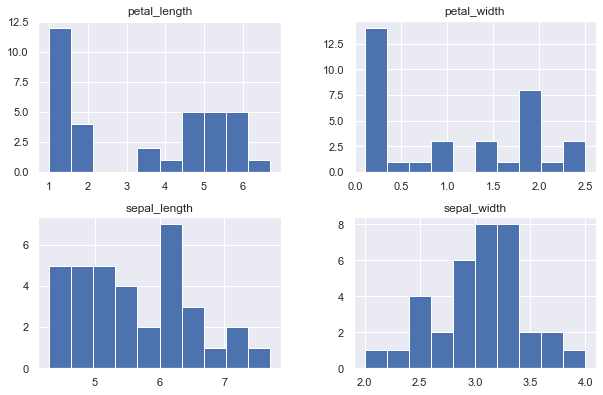

ScatterPlots for train


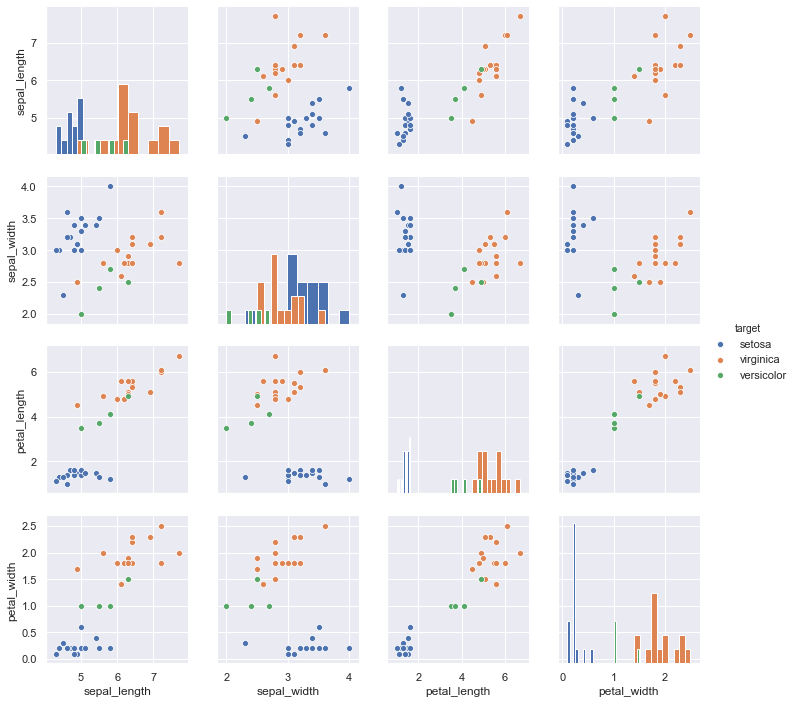

In [14]:
from zDataManager import DataManager
D = DataManager(data_name, data_dir)
print(D)
set_name = 'train'             # Make sure your code works for "train", "valid", and "test"
dd = D.DataStats(set_name)
hh = D.DataHist(set_name)
ss = D.ShowScatter(set_name)

# Part 2: Feature selection and construction
What is really useful about the previous plots is to COMPARE various data representations!
- Create your OWN features from raw data.
- Make simple normalizations or standardizations.
- Scale the features to make the distribution more uniform (use log, sqrt, square, etc.)
- Make combinations of features (weighted sums, products, etc.; use PCA, SVD, k-means).
- Select the best features.

## Part 2.1: Feature construction with PCA

In [15]:
# If you did things right in what precedes, datanum should be a scaled matrix (columns standardized)
# Just remove the last column
df_scaled = data_num.copy().drop(columns=['target'])

In [16]:
# UNCOMMENT IF YOU WANT: do something a bit different, take the log of the features first.
#df_log = data.copy().drop(columns=['target'])
#df_log = np.log(1+df_log) # Note that log(0) is not defined, beware of that, this is why I added 1.
#df_scaled = (df_log - df_log .mean()) /df_log.std()

#### Perform singular value decomposition

In [17]:
u, s, v = np.linalg.svd(df_scaled, full_matrices=True)
print('U {}'.format(u.shape))
print('S {}'.format(s.shape))
print('V {}'.format(v.shape))

U (35, 35)
S (4,)
V (4, 4)


#### Make a scree plot
This plot allows us to decide how many components to keep, considering the total variance explained.

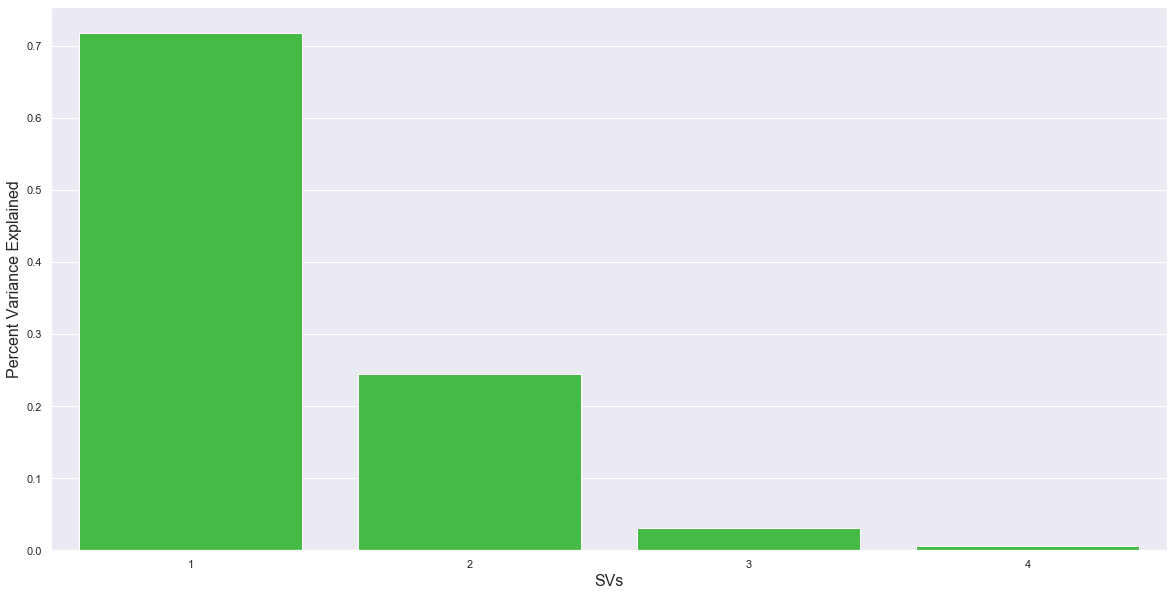

In [18]:
d = s.shape[0]
var_range = range(min(d,20)) # You may have MANY variables; this limits the number of variables shown
var_explained = np.round(s**2/np.sum(s**2), decimals=3)
sns.barplot(x=list(range(1,len(var_range)+1)),
            y=var_explained[var_range], color="limegreen")
plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent Variance Explained', fontsize=16)
plt.savefig('svd_scree_plot.png',dpi=100)

We see that after a certain number of features, there is a big drop in variance. So tentatively, keep the top few only.

In [19]:
fnum = 3
# Create a dataframe with only the 'feat_num' first principal components
labels= ['SV'+str(i) for i in range(1,fnum+1)]
df_svd = pd.DataFrame(u[:,0:fnum], columns=labels)
df_svd['target']=data['target']

In [20]:
df_svd.head().style.background_gradient(cmap='Blues').set_precision(2)

,SV1,SV2,SV3,target
0,-0.2,-0.092,0.1,setosa
1,-0.18,0.0053,0.045,setosa
2,0.14,-0.12,-0.11,virginica
3,0.16,0.093,0.059,virginica
4,-0.17,0.39,-0.17,setosa


Then make a pairplot:

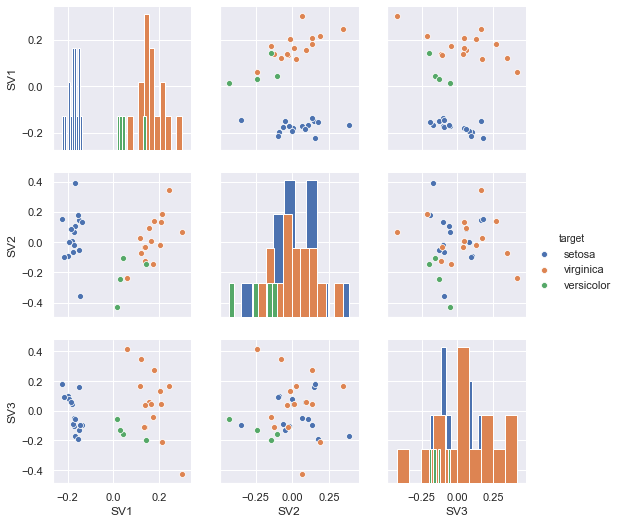

In [21]:
sns.pairplot(df_svd,diag_kind="hist", hue="target")

## Part 2.2: Comparison of LDA and PCA
There are several methods of reducing dimension. Singular value decomposition (SVD) described above does basically the same thing as Principal Component Analysis (PCA). It is an unsupervised learning method (the target values are not used). We seek the directions in data space of larges variance. In contrast, LDA uses the target values. Scikit-learn have both methods implemented. The code below is inspired from the <a href="https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py">scikit-learn documentation.</a>

In [22]:
data_num.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,-1.373249,-0.013559,-1.071512,-1.017506,0
1,-1.037139,0.461002,-0.918647,-1.017506,0
2,0.531374,-0.962681,1.119555,0.411767,2
3,0.867484,0.223722,1.068600,0.888191,2
4,0.195264,2.359246,-1.122467,-1.017506,0


explained variance ratio (first two components): [0.71789689 0.2449363 ]


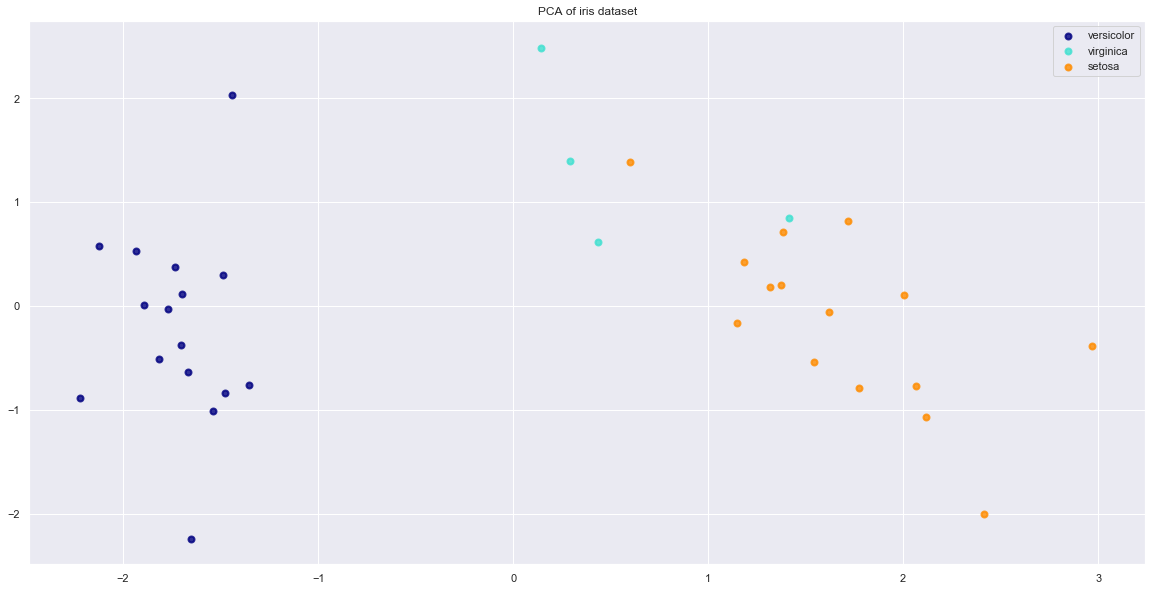

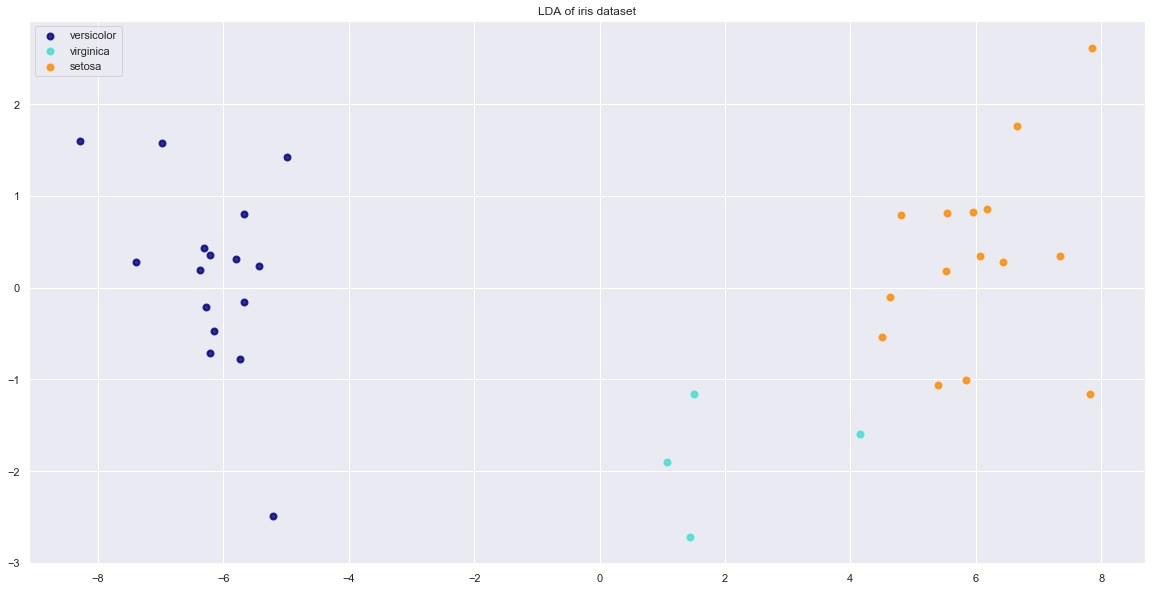

In [23]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = np.array(df_scaled)
y = np.array(data_num['target'])
target_names = set(data['target'])

pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit_transform(X, y)
d=len(target_names)
if d==2:
    X_r2 = np.concatenate((X_r2, X_r2), axis=1)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
colors = colors[0:d]
lw = 2

for color, i, target_name in zip(colors, range(d), target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of ' + data_name + ' dataset')

plt.figure()
for color, i, target_name in zip(colors, range(d), target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of ' + data_name + ' dataset')

plt.show()

## Part 2.3: Make a preprocessing class
Once you have experimented with preprocessing, it is convenient to make a class in the form of a scikit-learn preprocessing.

DataStats for train
              Feat1         Feat2
count  3.500000e+01  3.500000e+01
mean   5.075305e-17  3.806479e-17
std    1.719316e+00  1.004271e+00
min   -2.251188e+00 -2.276574e+00
25%   -1.707581e+00 -7.093158e-01
50%    2.967693e-01  7.102596e-03
75%    1.501619e+00  5.582735e-01
max    3.013091e+00  2.516653e+00
Histograms for train


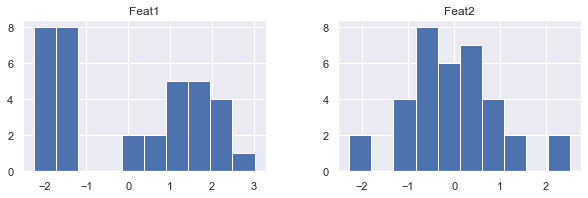

ScatterPlots for train


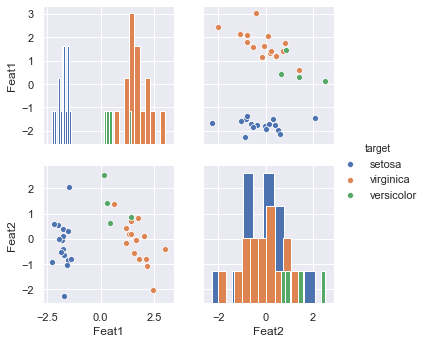

In [24]:
from preprocessing import Preprocessor
Prepro = Preprocessor(standardize=True, transformer='PCA', num_feat=2)
# Here it is useful to have already loaded the data as a DataManager D
# Preprocess on the data and load it back into D
# Then transform it
D.data['X_train'] = Prepro.fit_transform(D.data['X_train'], D.data['Y_train'])
D.data['X_valid'] = Prepro.transform(D.data['X_valid'])
D.data['X_test'] = Prepro.transform(D.data['X_test'])
D.feat_name = np.array(['Feat1', 'Feat2'])
D.feat_type = np.array(['Numeric', 'Numeric'])
  
# Then you can call some of the display methods again
set_name = 'train'             # Make sure your code works for "train", "valid", and "test"
dd = D.DataStats(set_name)
hh = D.DataHist(set_name)
ss = D.ShowScatter(set_name)

## Part 2.3: Test your preprocessing with a classifier
With this function you can view how easily it is to separate the classes with a classifiers, when only 2 features are selected. If the training accuracy is much better than the test accuracy, you are over-fitting!

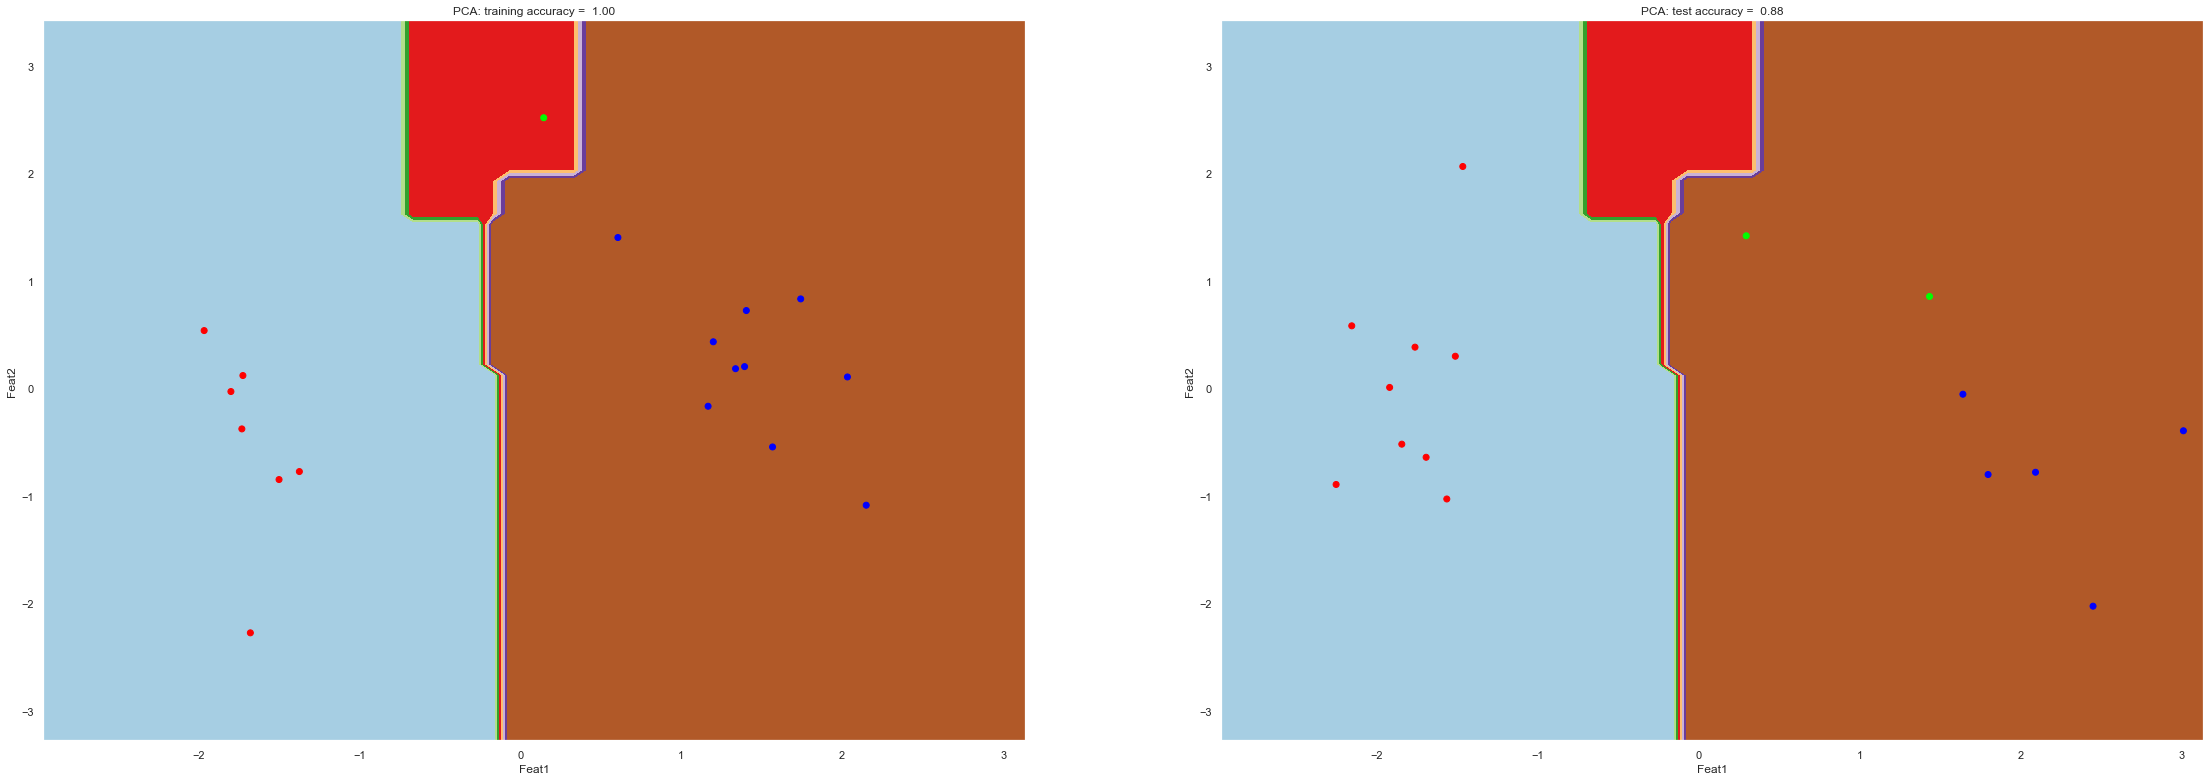

0.875

In [25]:
from sklearn.ensemble import RandomForestClassifier
M = RandomForestClassifier()
D.ClfScatter(M, dim1=0, dim2=1, title='PCA')

## Part 2.4: Select the preprocessing
It is complex to select simultaneously the best preprocessing and the best classifier. Tentatively, you can fix first the classifier and select the best preprocessing.

In [26]:
# Write here some code that performs cross-validation 
# and fills out a table of performance for 100 features selected 
# with or without standardization, for PCA, LDA, or SelectKbest.

In [27]:
# After you selected the best option out of the 6 ones above
# Vary the number of features and plot performance as a function of the 
# Number of features.

# Part 3 : Model class
You also need to create a model class, see our example. The example we provide really does not do anything at the moment... But we provide sample code you can modify in model.py.

## Part 3.1: Train and save the model and the results

In [28]:
from data_io import write
from model import model
# Uncomment the next line to show the code of the model
#??model 

Create an instance of the model (run the constructor) and attempt to reload a previously saved version from `sample_code_submission/`:

In [29]:
M = model()
trained_model_name = model_dir + data_name
# Uncomment the next line to re-load an already trained model
#M = M.load(trained_model_name)                  

Train the model (unless you reloaded a trained model) and make predictions. 

In [30]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']
if not(M.is_trained):     
    M.fit(X_train, Y_train)                     

Y_hat_train = M.predict(D.data['X_train']) # Optional, not really needed to test on taining examples
Y_hat_valid = M.predict(D.data['X_valid'])
Y_hat_test = M.predict(D.data['X_test'])

FIT: dim(X)= [35, 2]
FIT: dim(y)= [35, 1]
PREDICT: dim(X)= [35, 2]
PREDICT: dim(y)= [35, 1]
PREDICT: dim(X)= [35, 2]
PREDICT: dim(y)= [35, 1]
PREDICT: dim(X)= [35, 2]
PREDICT: dim(y)= [35, 1]


Save the trained model </b> (will be ready to reload next time around) and save the prediction results. IMPORTANT: if you save the trained model, it will be bundled with your sample code submission. Therefore your model will NOT be retrained on the challenge platform. Remove the pickle from the submission if you want the model to be retrained on the platform.

In [31]:
M.save(trained_model_name)                 
result_name = result_dir + data_name
from data_io import write
write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

sample_result_submission/iris_test.predict
sample_result_submission/iris_train.predict
sample_result_submission/iris_valid.predict


## Part 3.2: Scoring the results
### Load the challenge metric 
<b>The metric chosen for your challenge</b> is identified in the "metric.txt" file found in the `scoring_function/` directory. The function "get_metric" searches first for a metric having that name in my_metric.py, then in libscores.py, then in sklearn.metric.

In [32]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)
# Uncomment the next line to display the code of the scoring metric
#??scoring_function

Using scoring metric: accuracy_score


### Training performance 
The participants normally posess target values (labels) only for training examples (except for the sample data). We compute with the `example` metric the training score, which should be zero for perfect predictions.

In [33]:
training_score = scoring_function(Y_train, Y_hat_train)
print('Training score for the', metric_name, 'metric = %5.4f' % training_score)
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train))

Training score for the accuracy_score metric = 0.4571
Ideal score for the accuracy_score metric = 1.0000


### Cross-validation performance
The participants do not have access to the labels Y_valid and Y_test to self-assess their validation and test performances. But training performance is not a good prediction of validation or test performance. Using cross-validation, the training data is split into multiple training/test folds, which allows participants to self-assess their model during development. The average CV result and 95% confidence interval is displayed.

In [34]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
scores = cross_val_score(M, X_train, Y_train, cv=5, scoring=make_scorer(scoring_function))
cv_score = scores.mean()
cv_ebar = scores.std() * 2
print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (cv_score, cv_ebar))

FIT: dim(X)= [28, 2]
FIT: dim(y)= [28, 1]
PREDICT: dim(X)= [7, 2]
PREDICT: dim(y)= [7, 1]
FIT: dim(X)= [28, 2]
FIT: dim(y)= [28, 1]
PREDICT: dim(X)= [7, 2]
PREDICT: dim(y)= [7, 1]
FIT: dim(X)= [28, 2]
FIT: dim(y)= [28, 1]
PREDICT: dim(X)= [7, 2]
PREDICT: dim(y)= [7, 1]
FIT: dim(X)= [28, 2]
FIT: dim(y)= [28, 1]
PREDICT: dim(X)= [7, 2]
PREDICT: dim(y)= [7, 1]
FIT: dim(X)= [28, 2]
FIT: dim(y)= [28, 1]
PREDICT: dim(X)= [7, 2]
PREDICT: dim(y)= [7, 1]

CV score (95 perc. CI): 0.46 (+/- 0.33)


## Part 3.3: Custom classifier
Replace the method in model.py by your own code. Re-run the code above.
You may want first to create a function that does all the stuff we did above.

In [35]:
# Your code here.
# M = model()
# etc.
# For the moment we cheat, we replace M by RandomForest!
from sklearn.ensemble import RandomForestClassifier
M = RandomForestClassifier()

## Part 3.4: Preprocessing and model selection
You will probably try a lot of models and combinations of preprocessing and models during your project. 
        <br>
        <span style="color:red"> The role of the <b>PREPROCESSING BINOME</b> will be to experiment with various kinds of preprocessings: feature space reduction and/or augmentation.</span> The VISUALIZATION, PREPROCESSING, and PREDICTION binomes will have to collaborate to combine and compare methods.


It is important to visualiaze results. Think of the <a href="http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html">confusion matrix</a> and for binary classification problems <a href="http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html"> ROC curves</a>.

### Todo
Vous allez devoir experimenter avec plusieurs modeles et combiner divers preprocessings. Une facon bien pratique de proceder est d'utiliser les <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">Pipelines</a> de scikit-learn. D'autre part on a souvent de meilleures performances en faisant <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html">voter plusieurs classifieurs</a>.
<br> Pour comprendre ce qui se passe, c'est important de visualiser les resultats. Modifiez le code de la fonction test() dans zClassifier.py qui se trouve dans my_code/ en remplaçant la fonction `compute_accuracy` par un appel de ClfScatter pour chaque classifieur que l'on teste.

In [36]:
# Vieux code qui marche plus
#from model import test
#acc=test(D)

<div style="background:#FFFFAA">
<h1> FINAL STEP: Making a submission to Codalab </h1> 

<h2> Unit testing </h2> 

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 
<br>
Keep the sample code simple.
</div>

In [37]:
!python3 $problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir

Using input_dir: /Users/isabelleguyon/Documents/Projects/ParisSaclay/Enseignement/Fall2019Winter2020/L2/info232/TP11/iris
Using output_dir: /Users/isabelleguyon/Documents/Projects/ParisSaclay/Enseignement/Fall2019Winter2020/L2/info232/TP11/sample_result_submission
Using program_dir: /Users/isabelleguyon/Documents/Projects/ParisSaclay/Enseignement/Fall2019Winter2020/L2/info232/TP11/ingestion_program
Using submission_dir: /Users/isabelleguyon/Documents/Projects/ParisSaclay/Enseignement/Fall2019Winter2020/L2/info232/TP11/sample_code_submission

========== Ingestion program version 6 ==========

************************************************
******** Processing dataset Iris ********
************************************************
========= Reading and converting data ==========
Info file found : /Users/isabelleguyon/Documents/Projects/ParisSaclay/Enseignement/Fall2019Winter2020/L2/info232/TP11/iris/iris_public.info
========= Reading /Users/isabelleguyon/Documents/Projects/ParisSaclay/En

<div style="background:#FFFFAA">
Also test the scoring program:
    </div>

In [38]:
scoring_output_dir = 'scoring_output'
!python3 $score_dir/score.py $data_dir $result_dir $scoring_output_dir

======= Set 1 (Iris_test): accuracy_score(set1_score)=0.371428571429 =======
======= Set 2 (Iris_train): accuracy_score(set2_score)=0.457142857143 =======
======= Set 3 (Iris_valid): accuracy_score(set3_score)=0.314285714286 =======


<div style="background:#FFFFAA">
    <h1> Preparing the submission </h1>

Zip the contents of `sample_code_submission/` (without the directory), or download the challenge public_data and run the command in the previous cell, after replacing sample_data by public_data.
Then zip the contents of `sample_result_submission/` (without the directory).
<b><span style="color:red">Do NOT zip the data with your submissions</span></b>.</div>

In [39]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = '../sample_code_submission_' + the_date + '.zip'
sample_result_submission = '../sample_result_submission_' + the_date + '.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)

Submit one of these files:
../sample_code_submission_20-04-22-23-15.zip
../sample_result_submission_20-04-22-23-15.zip
